<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [66]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [67]:
# Answer: first number is the number of columns, the second is the number of rows
movies.shape

(979, 6)

#### Check the data type of each column.

In [68]:
# Answer: most of the data types are objects, while star_rating is a float and duraition is an int
movies.dtypes


star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [69]:
# Answer: the average movie duration is approximately 121 minutes long (rounded to the nearest whole minute)
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [70]:
# Answer: The shortest movies is Freaks and the longest is Hamlet.
movies.sort_values('duration')

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
742,7.6,Following,R,Mystery,69,"[u'Jeremy Theobald', u'Alex Haw', u'Lucy Russe..."
351,8.0,Frankenstein,UNRATED,Horror,70,"[u'Colin Clive', u'Mae Clarke', u'Boris Karloff']"
938,7.4,Alice in Wonderland,G,Animation,75,"[u'Kathryn Beaumont', u'Ed Wynn', u'Richard Ha..."
405,7.9,The Bride of Frankenstein,NOT RATED,Horror,75,"[u'Boris Karloff', u'Elsa Lanchester', u'Colin..."
303,8.0,The Nightmare Before Christmas,PG,Animation,76,"[u'Danny Elfman', u'Chris Sarandon', u""Catheri..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

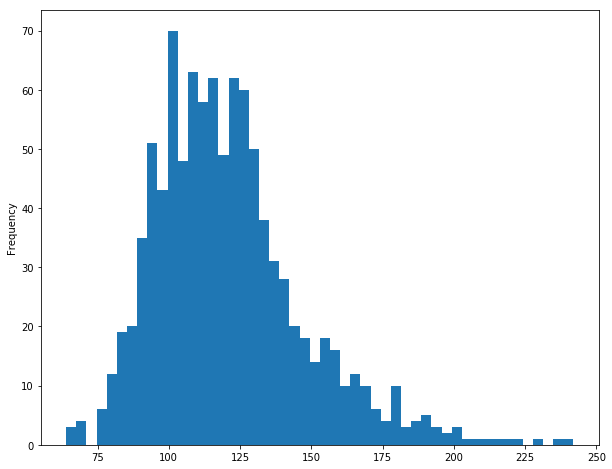

In [71]:
# Answer: Can choose 178 bins if you want a bar for each individual minute amount. I chose 50 bins because I felt that 
# it represented the data well without having to display the frequency for each individual minute.
movies.duration.plot(kind = 'hist', bins = 50, figsize = (10,8));

#### Use a box plot to display that same data.

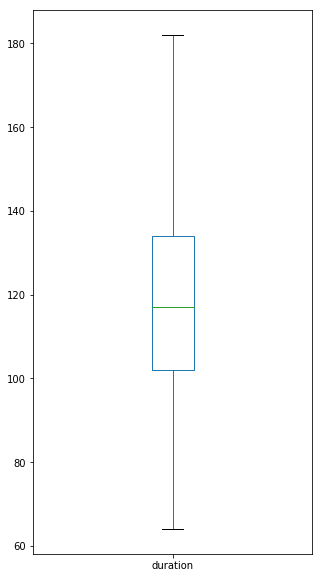

In [72]:
# Answer: I chose to remove the outliers from the boxplot, so the information was easier to see.
movies.duration.plot.box(showfliers = False, figsize = (5,10));

## Intermediate level

#### Count how many movies have each of the content ratings.

In [73]:
# Answer:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

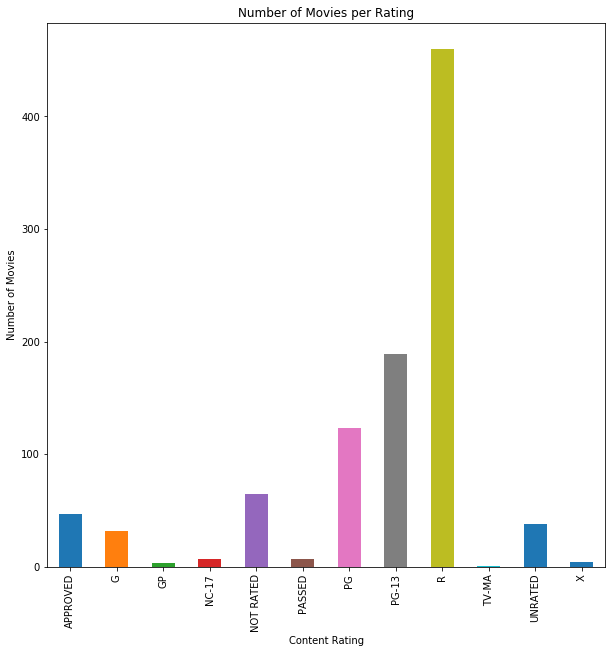

In [74]:
# Answer:
movies.content_rating.value_counts().sort_index().plot(kind='bar', figsize = (10,10));     # Bigger plot by increasing age
plt.xlabel('Content Rating');
plt.ylabel('Number of Movies');
plt.title('Number of Movies per Rating');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [75]:
# Answer:
movies['content_rating'].replace(to_replace = ['NOT RATED', 'APPROVED', 'PASSED', 'GP'], value = 'UNRATED', inplace = True)

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [76]:
# Answer: to check, I checked the value counts for content)ratings again and there is no longer and X or TV-MA rating. Also, the number of NC-17 movies has increased.
movies['content_rating'].replace(to_replace = ['X', 'TV-MA'], value = 'NC-17', inplace = True)
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [77]:
# Answer: only content_rating has missing values
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [78]:
# Answer: After searching online to see if any of these movies have a rating, but none are rated, so I assigned them as UNRATED.
movies[movies.content_rating.isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [79]:
movies.content_rating.fillna(value = 'UNRATED', inplace = True)


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [80]:
# Answer: The average rating for movies longer than 2 hours (120 minutes) is slightly larger than that for movies shorter than 2 hours.
movies.star_rating[movies.duration >= 120].mean()

7.948898678414082

In [81]:
movies.star_rating[movies.duration < 120].mean()

7.838666666666657

#### Use a visualization to detect whether there is a relationship between duration and star rating.

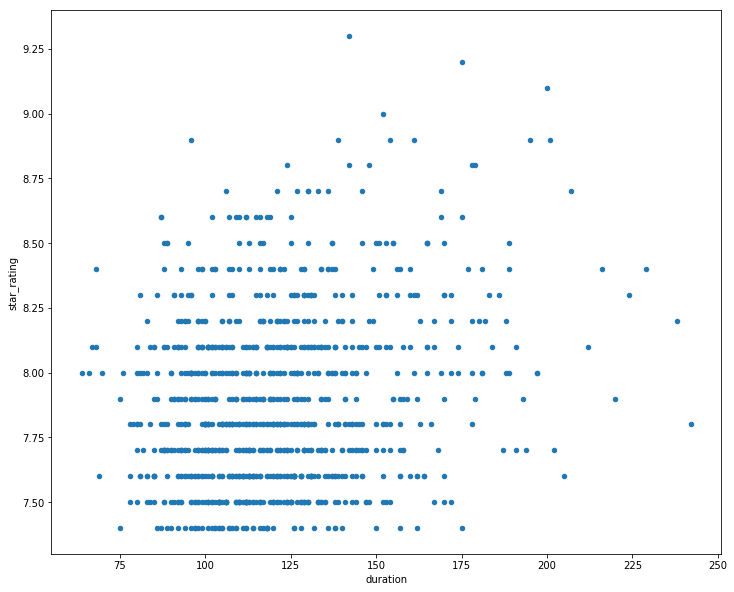

In [82]:
# Answer: there is no relationship to be seen in the scatter plot
movies.plot(kind = 'scatter', x = 'duration', y = 'star_rating', figsize = (12,10));


#### Calculate the average duration for each genre.

In [83]:
# Answer:
movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

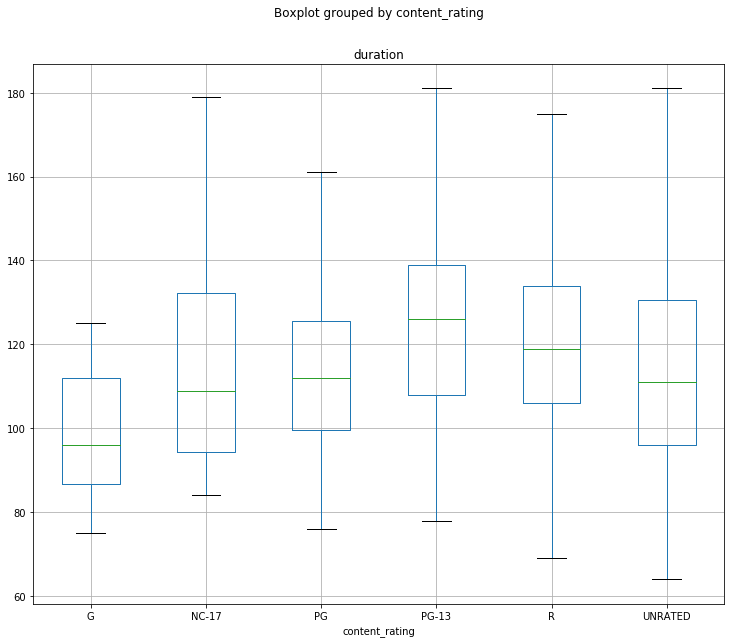

In [84]:
# Answer: 
title = movies.boxplot(column = 'duration', by = 'content_rating', showfliers = False, figsize = (12,10));


#### Determine the top rated movie (by star rating) for each genre.

In [85]:
# Answer: This part just shows the highest star_rating by genre
movies.groupby(['genre'])['star_rating'].max()

genre
Action       9.0
Adventure    8.9
Animation    8.6
Biography    8.9
Comedy       8.6
Crime        9.3
Drama        8.9
Family       7.9
Fantasy      7.7
Film-Noir    8.3
History      8.0
Horror       8.6
Mystery      8.6
Sci-Fi       8.2
Thriller     8.0
Western      8.9
Name: star_rating, dtype: float64

In [86]:
# This portion shows both the highest star_rating by genre and the title of the last movie(alphabetically) associated with this star rating (along with other information.
movies.groupby(['genre']).max()

,star_rating,title,content_rating,duration,actors_list
genre,,,,,
Action,9.0,Yojimbo,UNRATED,205,"[u'Ziyi Zhang', u'Takeshi Kaneshiro', u'Andy L..."
Adventure,8.9,True Grit,UNRATED,224,"[u'Yves Montand', u'Charles Vanel', u'Peter va..."
Animation,8.6,Wreck-It Ralph,UNRATED,134,"[u'Y\xf4ji Matsuda', u'Yuriko Ishida', u'Y\xfb..."
Biography,8.9,Walk the Line,UNRATED,202,"[u'Will Smith', u'Thandie Newton', u'Jaden Smi..."
Comedy,8.6,Zombieland,UNRATED,187,"[u'Zooey Deschanel', u'Joseph Gordon-Levitt', ..."
Crime,9.3,Zodiac,UNRATED,229,"[u'Yeong-ae Lee', u'Min-sik Choi', u'Shi-hoo K..."
Drama,8.9,Zulu,UNRATED,242,"[u'William Holden', u'Gloria Swanson', u'Erich..."
Family,7.9,Willy Wonka & the Chocolate Factory,PG,115,"[u'Henry Thomas', u'Drew Barrymore', u'Peter C..."
Fantasy,7.7,The City of Lost Children,R,112,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ..."


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [87]:
# Answer:
#While the movie titles are the same, all movies below are different movies since actors are different (along with other categories)
movies[movies['title'].duplicated(keep = False)]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [88]:
# I used this to manually determine which genres have at least 10 moveies associated with it
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [89]:
# Answer: Here I created a list of the genres based on the above results, then listed the aveage star_ratings of these genres
genre_list = ['Drama', 'Comdey', 'Action', 'Crime','Biography','Adventure','Animation', 'Horror','Mystery']
movies[movies.genre.isin(genre_list)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [90]:
# Answer: first, create a Series with the count values, then create a list where the count value is greater than or equal to 10, finally list the average star_rating for the genres from step 2
counts = movies.genre.value_counts()
genre_list2 =counts[counts >= 10].index
movies[movies.genre.isin(genre_list2)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [91]:
# Answer: create a series for the mean star_rating (grouped by genre), create a series of booleans for the genres where the movie count of the genre is at least ten and finally combine the two
a = movies.groupby('genre')['star_rating'].mean()
b = movies.genre.value_counts() >=10
a[b]


genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [92]:
new = movies.groupby('genre').star_rating.agg(['mean','count'])


In [93]:
new[new['count'] >= 10]

,mean,count
genre,,
Action,7.884559,136
Adventure,7.933333,75
Animation,7.914516,62
Biography,7.862338,77
Comedy,7.822436,156
Crime,7.916935,124
Drama,7.902518,278
Horror,7.806897,29
Mystery,7.975000,16


## Bonus

#### Figure out something "interesting" using the actors data!

In [94]:
# create a seperate dataframe of just the actors list to make it easier to work with
actors = pd.DataFrame(movies.actors_list)

In [95]:
#seperate the items in the list into seperate columns
actors_seperated = pd.DataFrame(actors['actors_list'].str.split().values.tolist())

In [96]:
#the previous step seperated names into first and last name, so the first and last name of the first actor was combined
actors_seperated['actor1'] = actors_seperated[0] + ' ' + actors_seperated[1]

In [97]:
# the first name in the list of actors looks to be the lead actor, so based on this, the most common lead actor in this list of movies is Zooey Deschanel.
actors_seperated.actor1.max() 

"[u'Zooey Deschanel',"